## Este notebook tem como objetivo reproduzir os resultados parciais

In [1]:
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')

import matplotlib as mpl
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from tqdm.notebook import tqdm

import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['font.size'] = 10
plt.rcParams['lines.linewidth'] = 1.8
plt.rcParams['text.usetex'] = False

figurePath = r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Figuras\Pibic'
path_data_Silas_Desktop = r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic'

In [4]:
def loadArray(file_path_prefix, num_files, file_path_suffix, flag_mean=False):
    
    data_list = []
    
    for i in range(num_files):
        file_path = f"{file_path_prefix}{i}{file_path_suffix}"
        with open(file_path, 'rb') as stream:
            data = np.load(stream)
            data_list.append(data)
    
    if flag_mean:
        data = np.mean(data_list, axis=0)
        return data
    
    else:
        return data_list

## Carrega os dados dos resultados parciais

In [5]:
num_files = 5 # Número de arquivos a serem carregados

# CSPR 
for indfile in range(0, num_files):
    CSPR_BER_PARCIAL = loadArray(path_data_Silas_Desktop+'\CSPR_BER_SpS_4_128_Sample_', indfile, '_outlier.npy', True)
    CSPR_SER_PARCIAL = loadArray(path_data_Silas_Desktop+'\CSPR_SER_SpS_4_128_Sample_', indfile, '_outlier.npy', True)
    CSPR_SNR_PARCIAL = loadArray(path_data_Silas_Desktop+'\CSPR_SNR_SpS_4_128_Sample_', indfile, '_outlier.npy', True) 
    CSPR_SIR_PARCIAL = loadArray(path_data_Silas_Desktop+'\CSPR_SIR_SpS_4_128_Sample_', indfile, '_outlier.npy', True)  

# Roll-off
for indfile in range(0, num_files):
    Rolloff_BER_PARCIAL = loadArray(path_data_Silas_Desktop+'\Rolloff_BER_SpS_4_128_Sample_', indfile, '.npy', True)
    Rolloff_SER_PARCIAL = loadArray(path_data_Silas_Desktop+'\Rolloff_SER_SpS_4_128_Sample_', indfile, '.npy', True)
    Rolloff_SNR_PARCIAL = loadArray(path_data_Silas_Desktop+'\Rolloff_SNR_SpS_4_128_Sample_', indfile, '.npy', True) 
    Rolloff_SIR_PARCIAL = loadArray(path_data_Silas_Desktop+'\Rolloff_SIR_SpS_4_128_Sample_', indfile, '.npy', True) 

# Frequency Offset 
FO_BER_PARCIAL = np.load(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\FO_BER_SpS_4_128_Sample.npy')
FO_SER_PARCIAL = np.load(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\FO_SER_SpS_4_128_Sample.npy')
FO_SNR_PARCIAL = np.load(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\FO_SNR_SpS_4_128_Sample.npy')
FO_SIR_PARCIAL = np.load(r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Data\Pibic\FO_SIR_SpS_4_128_Sample.npy')

## Resultados Variando o CSPR

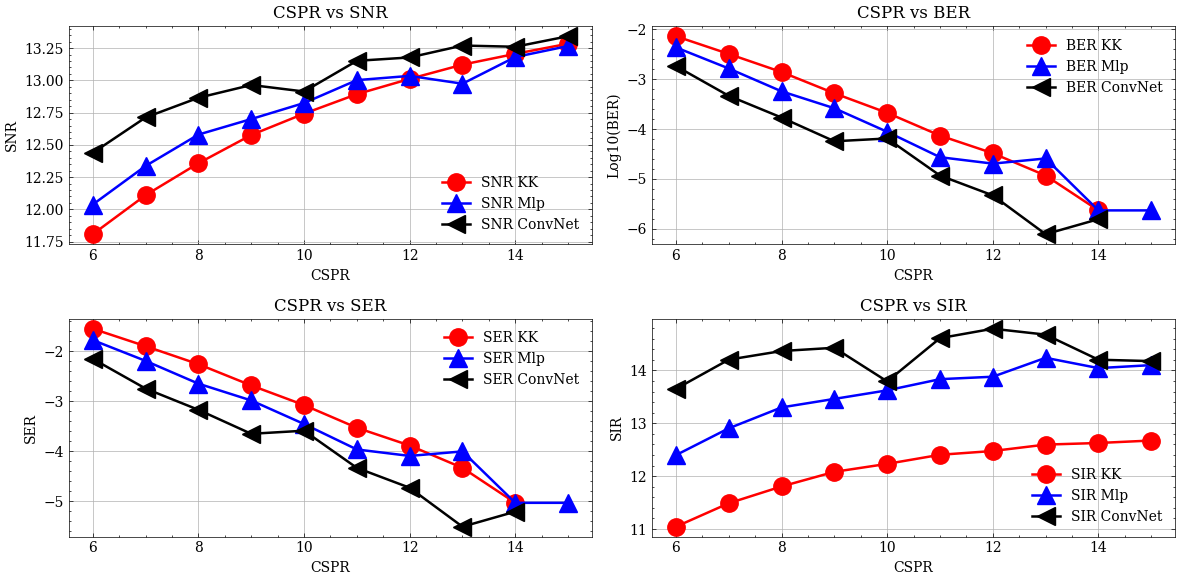

In [10]:
savePlots = False
loPower = np.arange(6,16,1)
markersize = 12.5
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

data = [
    (CSPR_SNR_PARCIAL, 'SNR', 'CSPR vs SNR', 'SNR KK', 'SNR Mlp', 'SNR ConvNet'),
    (CSPR_BER_PARCIAL, 'Log10(BER)', 'CSPR vs BER', 'BER KK', 'BER Mlp', 'BER ConvNet'),
    (CSPR_SER_PARCIAL, 'SER', 'CSPR vs SER', 'SER KK', 'SER Mlp', 'SER ConvNet'),
    (CSPR_SIR_PARCIAL, 'SIR', 'CSPR vs SIR', 'SIR KK', 'SIR Mlp', 'SIR ConvNet')
]

for i, ax in enumerate(axs.flat):
    data_to_plot, y_label, title, label1, label2, label3 = data[i]
    
    if y_label in ['SNR', 'SIR']:
        ax.plot(loPower, 10*np.log10(data_to_plot[0, :]), color='red', marker='o', markersize=markersize, label=label1)
        ax.plot(loPower, 10*np.log10(data_to_plot[1, :]), color='blue', marker='^', markersize=markersize, label=label2)
        ax.plot(loPower, 10*np.log10(data_to_plot[2, :]), color='black', marker='<', markersize=markersize, label=label3)
    
    else:
        ax.plot(loPower, np.log10(data_to_plot[0, :]), color='red', marker='o', markersize=markersize, label=label1)
        ax.plot(loPower, np.log10(data_to_plot[1, :]), color='blue', marker='^', markersize=markersize, label=label2)
        ax.plot(loPower, np.log10(data_to_plot[2, :]), color='black', marker='<', markersize=markersize, label=label3)
    
    ax.set_xlabel('CSPR')
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.legend()
    ax.grid()

plt.tight_layout()

if savePlots:
     plt.savefig(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Figuras\Pibic'+'\CSPR_Results.png', dpi=600)

## Resultados Variando o Rolloff

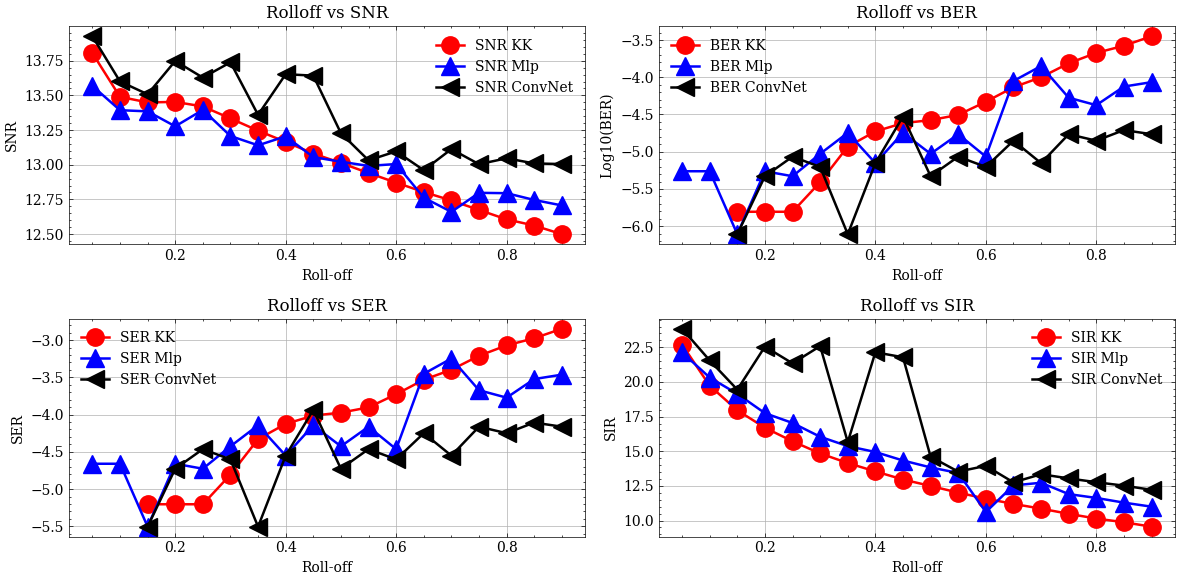

In [11]:
savePlots = False
Rolloff = np.arange(0.05, 0.95, 0.05)
markersize = 12.5
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

data = [
        (Rolloff_SNR_PARCIAL, 'SNR', 'Rolloff vs SNR', 'SNR KK', 'SNR Mlp', 'SNR ConvNet'),
        (Rolloff_BER_PARCIAL, 'Log10(BER)', 'Rolloff vs BER', 'BER KK', 'BER Mlp', 'BER ConvNet'),
        (Rolloff_SER_PARCIAL, 'SER', 'Rolloff vs SER', 'SER KK', 'SER Mlp', 'SER ConvNet'),
        (Rolloff_SIR_PARCIAL, 'SIR', 'Rolloff vs SIR', 'SIR KK', 'SIR Mlp', 'SIR ConvNet')
    ]

for i, ax in enumerate(axs.flat):
    data_to_plot, y_label, title, label1, label2, label3 = data[i]
    
    if y_label in ['SNR', 'SIR']:
        ax.plot(Rolloff, 10*np.log10(data_to_plot[0, :]), color='red', marker='o', markersize=markersize, label=label1)
        ax.plot(Rolloff, 10*np.log10(data_to_plot[1, :]), color='blue', marker='^', markersize=markersize, label=label2)
        ax.plot(Rolloff, 10*np.log10(data_to_plot[2, :]), color='black', marker='<', markersize=markersize, label=label3)
    else:
        ax.plot(Rolloff, np.log10(data_to_plot[0, :]), color='red', marker='o', markersize=markersize, label=label1)
        ax.plot(Rolloff, np.log10(data_to_plot[1, :]), color='blue', marker='^', markersize=markersize, label=label2)
        ax.plot(Rolloff, np.log10(data_to_plot[2, :]), color='black', marker='<', markersize=markersize, label=label3)
    
    ax.set_xlabel('Roll-off')
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.legend()
    ax.grid()

plt.tight_layout()

if savePlots:
     plt.savefig(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Figuras\Pibic'+'\CSPR_Results.png', dpi=600)

## Resultados variando o FO (frequency offset)

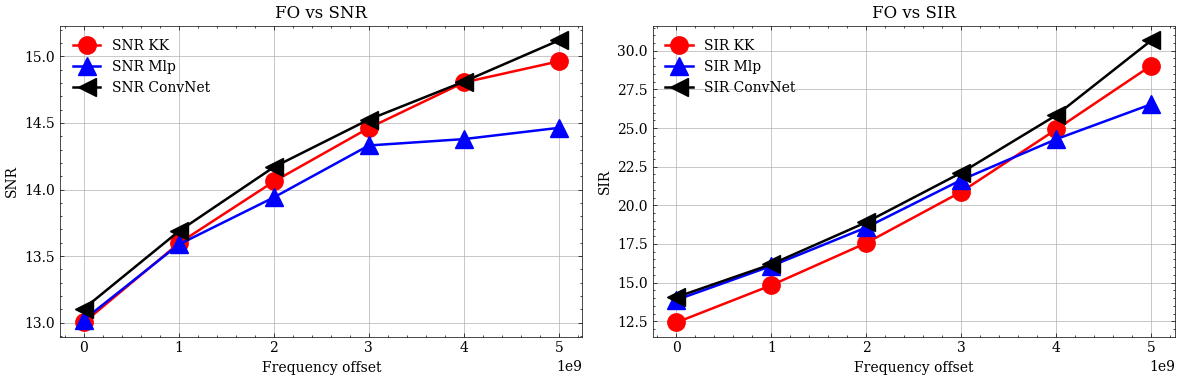

In [22]:
FO_Values = np.arange(0e9, 6e9, 1e9)
savePlots = False
markersize = 12.5

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

data = [
        (FO_SNR_PARCIAL, 'SNR', 'FO vs SNR', 'SNR KK', 'SNR Mlp', 'SNR ConvNet'),
        (FO_SIR_PARCIAL, 'SIR', 'FO vs SIR', 'SIR KK', 'SIR Mlp', 'SIR ConvNet')
    ]

for i, ax in enumerate(axs.flat):
    data_to_plot, y_label, title, label1, label2, label3 = data[i]
    ax.plot(FO_Values, 10*np.log10(data_to_plot[0, :]), color='red', marker='o', markersize=markersize, label=label1)
    ax.plot(FO_Values, 10*np.log10(data_to_plot[1, :]), color='blue', marker='^', markersize=markersize, label=label2)
    ax.plot(FO_Values, 10*np.log10(data_to_plot[2, :]), color='black', marker='<', markersize=markersize, label=label3)
    ax.set_xlabel('Frequency offset')
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.legend()
    ax.grid()

plt.tight_layout()

if savePlots:
     plt.savefig(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Figuras\Pibic'+'\CSPR_Results.png', dpi=600)